AS the sample size increases, the difference between biased variance and unbiased variance becomes shorter

In [ ]:
import numpy as np
n = 10
a = np.random.random(n)
biased_variance  = (1/(n))*((a-a.mean()) ** 2).sum()
unbiased_variance = (1/(n-1))*((a-a.mean()) ** 2).sum()

In [ ]:
print(biased_variance) 
print(unbiased_variance)

0.10416885462014941
0.115743171800166


In [ ]:
import numpy as np
n = 10000
a = np.random.random(n)
biased_variance  = (1/(n))*((a-a.mean()) ** 2).sum()
unbiased_variance = (1/(n-1))*((a-a.mean()) ** 2).sum()

In [ ]:
print(biased_variance) 
print(unbiased_variance)

0.08343585521434647
0.08344419963430989


## Using Quantiles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d = np.load("exams.npy")
p = d[:, 0].astype("uint32")
q = np.quantile(p, [0.0, 0.25, 0.5, 0.75, 1.0])

print()
print("Quartiles: ", q)
print()
print("Counts by quartile")
print("   %d" % ((q[0] <= p) & (p < q[1])).sum())
print("   %d" % ((q[1] <= p) & (p < q[2])).sum())
print("   %d" % ((q[2] <= p) & (p < q[3])).sum())
print("   %d" % ((q[3] <= p) & (p < q[4])).sum())


Quartiles:  [ 18.    56.75  68.    78.   100.  ]

Counts by quartile
   250
   237
   253
   248


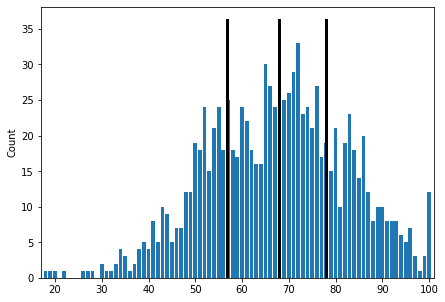

In [ ]:
h = np.bincount(p, minlength=100)
x = np.arange(101)
plt.bar(x, h, width=0.8*(x[1]-x[0]))
n = 1.1*h.max()
plt.plot([q[1], q[1]], [0, n], linewidth=3, color='k')
plt.plot([q[2], q[2]], [0, n], linewidth=3, color='k')
plt.plot([q[3], q[3]], [0, n], linewidth=3, color='k')
plt.xlim((p.min()-1, p.max()+1))
plt.ylabel("Count")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefig("quantiles_plot.png", dpi=300)
plt.show()
# plt.close()

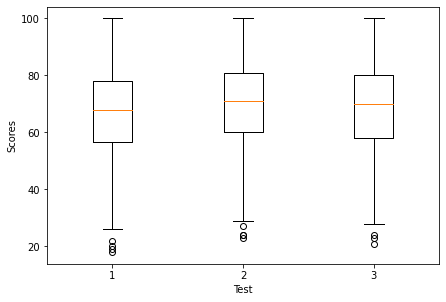

In [ ]:
# both plot
plt.boxplot(d)
plt.xlabel("Test")
plt.ylabel("Scores")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefig("box_plot.png", dpi=300)
plt.show()
# plt.close()

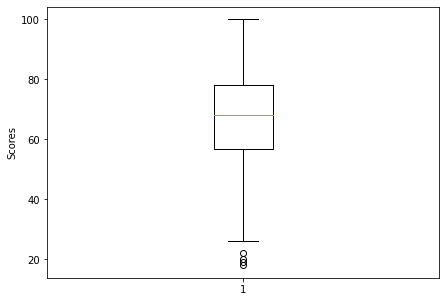

In [ ]:
plt.boxplot(p)
plt.ylabel("Scores")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefit("box_plot_1.png", dpi=300)
plt.show()
# plt.close()

## Missing Values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

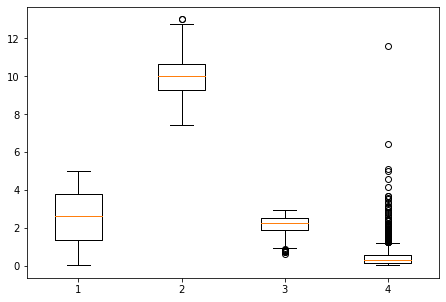

In [ ]:
N = 1000
np.random.seed(73939133)
x =  np.zeros((N, 4))
x[:, 0] = 5*np.random.random(N)
x[:, 1] = np.random.normal(10, 1, size=N)
x[:, 2] = 3*np.random.beta(5,2, N)
x[:, 3] = 0.3 * np.random.lognormal(size=N)

plt.boxplot(x)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefig("missing_box_plot.png", dpi=300)
# plt.close()


In [ ]:
# Make 5% of the values NaN
i = np.random.randint(0, N, size=int(0.05*N))
x[i,0] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 1] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 2] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 3] = np.nan


NaNs present


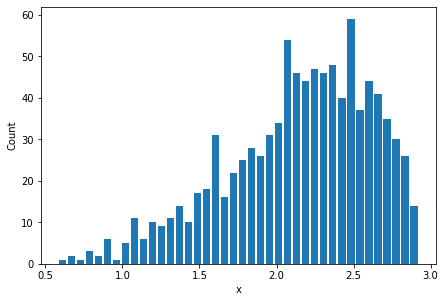

In [ ]:
# Do we have NaNs in feature 2?
if(np.isnan(x[:,2]).sum() != 0):
  print("NaNs present")
  i = np.where(np.isnan(x[:,2]) == False)
  z = x[i, 2]
  mn, md, s = z.mean(), np.median(z), z.std(ddof=1)
  hh, xx = np.histogram(z, bins=40)
  plt.bar(xx[:-1], hh, width=0.8*(xx[1]-xx[0]))
  plt.xlabel("x")
  plt.ylabel("Count")
  plt.tight_layout(pad=0, w_pad=0, h_pad=0)
  plt.show()
  # plt.savefit("missing_feature_2_plot.png", dpi=300)
  # plt.close()

non-NaN mean, std =  2.169986269563819 0.4745140140980093
updated mean, std =  2.173269045427578 0.4629566451638146


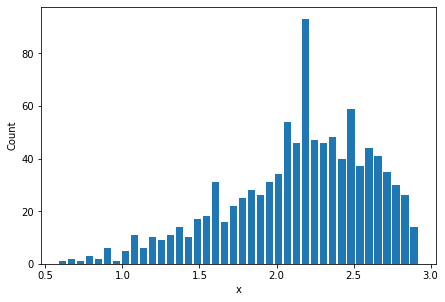

In [ ]:
if(np.isnan(x[:,2]).sum() != 0):
  i = np.where(np.isnan(x[:, 2]) == True)
  x[i, 2] = md # replace w/median

  print("non-NaN mean, std = ", z.mean(), z.std(ddof=1))
  print("updated mean, std = ", x[:, 2].mean(), x[:, 2].std(ddof=1))

  hh, xx = np.histogram(x[:, 2], bins=40)
  plt.bar(xx[:-1], hh, width=0.8*(xx[1]-xx[0]))
  plt.xlabel("x")
  plt.ylabel("Count")
  plt.tight_layout(pad=0, w_pad=0, h_pad=0)
  plt.show()
  # plt.savefig("missing_feature_2_updated_plot.png", dpi=300)
  # plt.close()

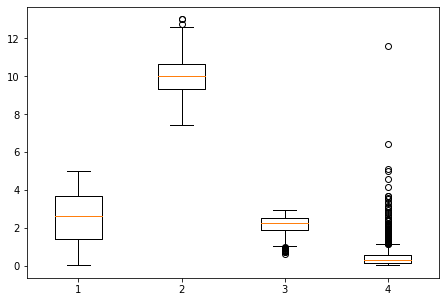

In [ ]:
# Do the same to others
i = np.where(np.isnan(x[:, 0]) == False)
m = np.median(x[i, 0])
i = np.where(np.isnan(x[:, 0]) == True)
x[i, 0] = m

i = np.where(np.isnan(x[:, 1]) == False)
m = np.median(x[i, 1])
i = np.where(np.isnan(x[:, 1]) == True)
x[i, 1] = m

i = np.where(np.isnan(x[:, 3]) == False)
m = np.median(x[i, 3])
i = np.where(np.isnan(x[:, 3]) == True)
x[i, 3] = m

plt.boxplot(x)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefig("missing_updated_box_plot.png", dpi=300)
# plt.close()

## Correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
np.random.seed(8675309)

In [ ]:
N = 100
x = np.linspace(0, 1, N) + (np.random.random(N) - 0.5)
y = np.random.random(N) * x
z = -0.1 * np.random.random(N)*x

In [ ]:
print(x)
print(y)
print(z)

[ 0.31245912  0.2611461  -0.12243146 -0.26740219 -0.05059483 -0.36737022
 -0.22440742 -0.015412   -0.40102454  0.26068566  0.20111351  0.53039327
 -0.03605961  0.1864928   0.35893464 -0.16985312  0.59072878  0.43323201
 -0.19793649  0.32759112 -0.17227025 -0.17455559  0.54348101  0.68943772
 -0.20156662  0.43146638 -0.14555018  0.62743354 -0.14487476  0.77477553
  0.69373662  0.20794274  0.17834131  0.57751433  0.07400327 -0.11141428
  0.75526185  0.45961951  0.04589426  0.70675591  0.67929252  0.44484954
  0.32735994 -0.05185545  0.49659441  0.10242908  0.61557639  0.77006253
  0.90098178  0.7179596   0.1496393   0.08213664  0.71036937  0.19528999
  0.79001132  0.6103903   0.43356075  1.01611532  0.39353825  0.37885225
  0.87835903  0.69838204  0.52661854  0.30528467  0.85784283  0.47356657
  1.14576795  0.40272775  1.10843673  0.92624655  0.84897998  0.38436518
  0.53827757  0.37249526  0.57255794  0.33664615  0.66849967  1.14836383
  0.82876692  1.06471669  0.33345306  0.82493151  0

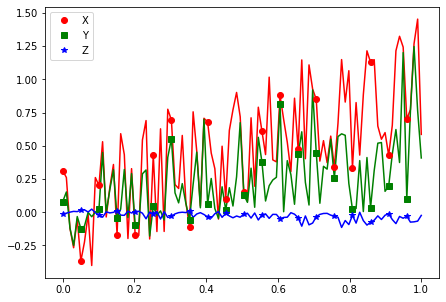

In [ ]:
plt.plot(np.linspace(0, 1, N), x, color='r')
plt.plot(np.linspace(0, 1, N), y, color='g')
plt.plot(np.linspace(0, 1, N), z, color='b')
plt.plot(np.linspace(0, 1, N)[::5], x[::5], color='r', marker='o', linestyle='none', label='X')
plt.plot(np.linspace(0, 1, N)[::5], y[::5], color='g', marker='s', linestyle='none', label='Y')
plt.plot(np.linspace(0, 1, N)[::5], z[::5], color='b', marker='*', linestyle='none', label='Z')
plt.legend(loc="upper left")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefit("correlation_scatter_plot.png", dpi=300)
# plt.close()

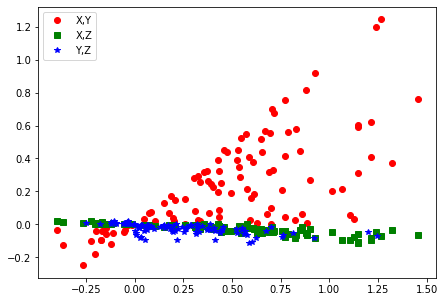

In [ ]:
plt.plot(x, y, marker='o', linestyle='none', color='r', label="X,Y")
plt.plot(x, z, marker='s', linestyle='none', color='g', label="X,Z")
plt.plot(y, z, marker='*', linestyle='none', color='b', label="Y,Z")
plt.legend(loc="upper left")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefig("correlation_scatter_plot.png", dpi=300)
# plt.close()

In [ ]:
from scipy.stats import pearsonr, spearmanr 
print("Pearson(x,y) : ", pearsonr(x, y)[0])
print("Spearman(x,y) : ", spearmanr(x, y)[0])
print()
print("Pearson(x,z) : ", pearsonr(x, z)[0])
print("Spearman(x,z) : ", spearmanr(x, z)[0])
print()
print("Pearson(y,z) : ", pearsonr(y, z)[0])
print("Spearman(y,z) : ", spearmanr(y, z)[0])
print()

Pearson(x,y) :  0.6828516550443248
Spearman(x,y) :  0.6940174017401739

Pearson(x,z) :  -0.8504746770227909
Spearman(x,z) :  -0.895085508550855

Pearson(y,z) :  -0.5653610370701884
Spearman(y,z) :  -0.6414041404140414



In [ ]:
def pearson(x,y):
  exy = (x*y).mean()
  ex = x.mean()
  ey = y.mean()
  exx = (x*x).mean()
  ex2 = x.mean() ** 2
  eyy = (y*y).mean()
  ey2 = y.mean()**2
  return (exy - ex*ey)/(np.sqrt(exx-ex2) * np.sqrt(eyy-ey2))

In [ ]:
print("Pearson(x,y): ", pearson(x,y))
print("Pearson(x,z): ", pearson(x,z))
print("Pearson(y,z): ", pearson(y,z))

Pearson(x,y):  0.6828516550443247
Pearson(x,z):  -0.8504746770227909
Pearson(y,z):  -0.5653610370701883


In [ ]:
d = np.vstack((x,y,z))
print(np.corrcoef(d))
print()

[[ 1.          0.68285166 -0.85047468]
 [ 0.68285166  1.         -0.56536104]
 [-0.85047468 -0.56536104  1.        ]]



In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
a = china[230, :, 1].astype("float64")
b = china[231, :, 1].astype("float64")
c = china[400, :, 1].astype("float64")
d = np.random.random(640)
print("china(a, b): ", pearson(a, b))
print("china(a, c): ", pearson(a, c))
print("china(a, d): ", pearson(a, d))
print()

china(a, b):  0.8979359541118713
china(a, c):  -0.276082058438271
china(a, d):  -0.06717496519306748



In [ ]:
# spearman
def spearman(x, y):
  n = len(x)
  t = x[np.argsort(x)]
  rx = []
  for i in range(n):
    rx.append(np.where(x[i] == t)[0][0])
  rx = np.array(rx, dtype="float64")
  t = y[np.argsort(y)]
  ry = []
  for i in range(n):
    ry.append(np.where(y[i] == t)[0][0])
  ry = np.array(ry, dtype="float64")
  d = rx - ry
  return 1.0 - (6.0/(n*(n*n-1)))*(d**2).sum()

In [ ]:
print(spearman(x,y), spearmanr(x,y)[0])
print(spearman(x,z), spearmanr(x,z)[0])
print(spearman(y,z), spearmanr(y,z)[0])
print()

0.694017401740174 0.6940174017401739
-0.8950855085508551 -0.895085508550855
-0.6414041404140414 -0.6414041404140414



In [ ]:
a = np.linspace(-20, 20, 1000)
b = 1.0 / (1.0 + np.exp(-a))
print(pearson(a, b))
print(spearman(a, b))

0.9053277293366915
1.0


## Hypothesis

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
np.random.seed(65535)
a = np.random.normal(85,6,50).astype("int32")
a[np.where(a > 100)] = 100
b = np.random.normal(82,7,50).astype("int32")
b[np.where(b > 100)] = 100

print(a)
print()
print(b)
print()

[ 81  80  85  87  83  87 100  90  79  83  88  75  87  92  78  80  83  91
  82  88  89  92  97  82  79  82  82  85  89  91  83  85  77  81  90  87
  82  84  86  79  84  85  90  84  90  85  85  78  94  87]

[92 82 78 74 86 69 83 67 85 82 81 91 79 82 82 88 80 63 85 86 77 94 85 75
 77 89 86 71 82 82 80 88 72 91 90 92 95 87 71 83 94 90 78 60 76 88 91 83
 85 73]



In [ ]:
print("With means of 82 & 85:")
from scipy.stats import ttest_ind
t,p = ttest_ind(a,b,equal_var=False)
print("(t=%0.5f, p=%0.5f)" % (t,p))

With means of 82 & 85:
(t=2.40234, p=0.01852)


(U=997.00000, p=0.04058)


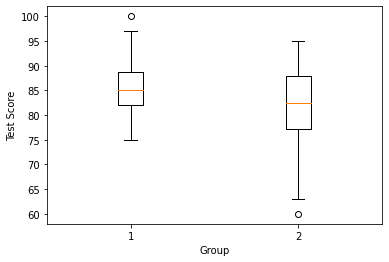

In [ ]:
from scipy.stats import mannwhitneyu 
u,p = mannwhitneyu(a,b)
print("(U=%0.5f, p=%0.5f)" % (u,p))

plt.boxplot((a,b))
plt.xlabel("Group")
plt.ylabel("Test Score")
plt.show()

In [ ]:
from scipy import stats
def CI(a, b, alpha=0.05):
  n1, n2 = len(a), len(b)
  s1, s2 = np.std(a, ddof=1)**2, np.std(b, ddof=1)**2